# Social Media and Wellbeing Analysis Project

This notebook examines the relationship between social media usage and wellbeing through three research questions:

**Research Questions:**
- **Q1:** Days Without Social Media vs. Wellbeing Score
- **Q2:** Platform Demographics and Screen Time
- **Q3:** Stress Level Predictors


## Table of Contents

1. [Setup & Imports](#1-setup--imports)
2. [Data Loading](#2-data-loading)
3. [Data Understanding](#3-data-understanding)
4. [Data Cleaning](#4-data-cleaning)
5. [Question 1: Days Without Social Media](#5-question-1)
6. [Question 2: Platform Demographics](#6-question-2)
7. [Question 3: Stress Predictors](#7-question-3)
8. [Summary and Conclusions](#8-summary)


## 1. Setup & Imports

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
import os

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_rows', 50)

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.inspection import PartialDependenceDisplay
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score,
    accuracy_score, f1_score, precision_score, recall_score,
    confusion_matrix, roc_curve, roc_auc_score
)

# Styling
plt.style.use('seaborn-v0_8-whitegrid')

print('✓ All libraries imported successfully')

## 2. Data Loading

### 2.1 Load Original Dataset

In [ ]:
# Load the original dataset
df = pd.read_csv('../data/socialmedia_dataset_original.csv')

print(f'✓ Dataset loaded')
print(f'  Shape: {df.shape}')
print(f'  Rows: {len(df)}, Columns: {len(df.columns)}')

### 2.2 Preview Data

In [ ]:
df.head()

## 3. Data Understanding

### 3.1 Dataset Information

In [ ]:
# Basic information about the dataset
print('Dataset Info:')
print(f'  Rows: {df.shape[0]}')
print(f'  Columns: {df.shape[1]}')
print(f'\nColumn names:')
for col in df.columns:
    print(f'  - {col}')

In [ ]:
df.info()

### 3.2 Statistical Summary

In [ ]:
df.describe()

### 3.3 Data Quality Checks

In [ ]:
# Check for missing values
print('Missing Values:')
print(df.isnull().sum())

print(f'\nDuplicate rows: {df.duplicated().sum()}')

## 4. Data Cleaning

### 4.1 Create Working Copy

In [ ]:
# Create working copy
df_clean = df.copy()

print('✓ Working copy created: df_clean')

### 4.2 Handle Missing Values

In [224]:
# Create a copy to preserve original data
df_clean = df.copy()


In [225]:
# Create composite Wellbeing Score
# Wellbeing Score = f(Happiness_Index, Sleep_Quality, Exercise_Frequency, Stress_Level)



In [226]:
# Save cleaned dataset
df_clean.to_csv('../data/wellbeing_data_cleaned.csv', index=False)


NameError: name 'df_clean' is not defined

### 4.3 Save Cleaned Data

In [ ]:
# Save cleaned dataset
df_clean.to_csv('../data/socialmedia_clean.csv', index=False)

print('✓ Cleaned data saved to: ../data/socialmedia_clean.csv')
print(f'  Final shape: {df_clean.shape}')

## 5. Question 1: Days Without Social Media and Wellbeing

**Research Question:** To what extent is the number of Days_Without_Social_Media related to an individual's overall Wellbeing_Score?

### 5.1 Wellbeing Score vs Days Without Social Media Analysis

In [17]:
# Calculate Days Without Social Media statistics by the Wellbeing Score
df_clean.groupby('Days_Without_Social_Media')['Wellbeing_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Days_Without_Social_Media,,,,,,,,
0.0,48.0,21.083333,4.057215,14.0,18.00,21.0,24.0,29.0
1.0,58.0,21.620690,3.773535,14.0,19.00,21.5,25.0,29.0
2.0,86.0,20.906977,4.533867,12.0,18.00,21.0,24.0,32.0
3.0,92.0,21.456522,4.529302,10.0,18.75,22.0,24.0,32.0
4.0,87.0,22.172414,4.210195,13.0,20.00,22.0,25.0,31.0
5.0,78.0,21.717949,4.600670,12.0,19.00,22.0,25.0,32.0
6.0,36.0,21.972222,4.031916,14.0,19.75,22.0,25.0,29.0
7.0,14.0,20.214286,5.351902,13.0,16.25,18.5,25.0,30.0
9.0,1.0,20.000000,NaN,20.0,20.00,20.0,20.0,20.0


In summary the average wellbeing score of users is approximately 21 with most user taking 3 days off from social media. Also from the statistical summary we can see that there is not enough data to calculate the standard deviation as there was only one user who went 9 days without social media. This may present a skewed result later on in the analysis.

In [ ]:

# Statistical Summary
df_clean['Wellbeing_Score'].describe()

count    500.000000
mean      21.510000
std        4.342766
min       10.000000
25%       19.000000
50%       22.000000
75%       25.000000
max       32.000000
Name: Wellbeing_Score, dtype: float64

In [ ]:
# Statistical Summary 
df_clean['Days_Without_Social_Media'].describe()

count    500.000000
mean       3.134000
std        1.858751
min        0.000000
25%        2.000000
50%        3.000000
75%        5.000000
max        9.000000
Name: Days_Without_Social_Media, dtype: float64

The above statistical summary for only Days_Without_Social_Media and Wellbeing_Score respectively almost matches the groupby statistic summary with regards to the average wellbeing score number and days without social media number.

In [19]:
# Distribution of Wellbeing Score
df_clean["Wellbeing_Score"].value_counts()

Wellbeing_Score
22.0    47
19.0    44
20.0    43
24.0    41
23.0    40
21.0    40
27.0    36
17.0    30
25.0    29
26.0    24
18.0    22
16.0    22
14.0    18
28.0    15
29.0    10
13.0     9
15.0     8
30.0     7
12.0     6
31.0     3
32.0     3
11.0     2
10.0     1
Name: count, dtype: int64

<Axes: xlabel='Wellbeing_Score'>

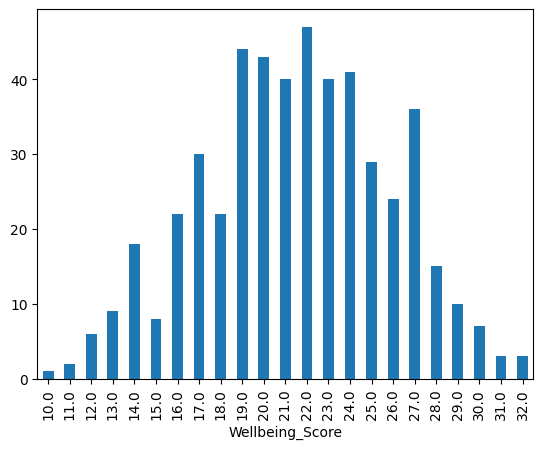

In [25]:
# Visual distribution using plot bar of the value count
df_clean["Wellbeing_Score"].value_counts().sort_index().plot(kind='bar') # sorting the x axis to be in order of smallest to largest

In [ ]:
#Get Days without social media count
df_clean["Days_Without_Social_Media"].value_counts() 

Days_Without_Social_Media
3.0    92
4.0    87
2.0    86
5.0    78
1.0    58
0.0    48
6.0    36
7.0    14
9.0     1
Name: count, dtype: int64

<Axes: xlabel='Days_Without_Social_Media'>

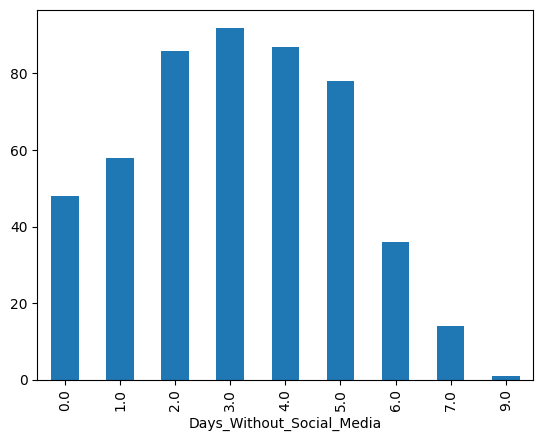

In [27]:
# Visual distribution using plot bar of the value count
df_clean["Days_Without_Social_Media"].value_counts().sort_index().plot(kind='bar') # Sorting the x axis to be in order of smallest to largest

### 5.2 Correlation Analysis

In [30]:
# Calculate correlation

corr_well = df_clean['Wellbeing_Score'].corr(df_clean['Days_Without_Social_Media'])
print(f'The correlation between a users wellbeing score and the number of days they do not use social media is {corr_well}')

corr_sleep = df_clean['Wellbeing_Score'].corr(df_clean['Sleep_Quality(1-10)'])
print(f'The correlation between a users wellbeing score and their sleep quality level is {corr_sleep}')

corr_stress = df_clean['Wellbeing_Score'].corr(df_clean['Stress_Level(1-10)'])
print(f'The correlation between a users wellbeing score and their level of stress is {corr_stress}')

corr_exer = df_clean['Wellbeing_Score'].corr(df_clean['Exercise_Frequency(week)'])
print(f'The correlation between a users wellbeing score and the number of days they exercise per week is {corr_exer}')

corr_happ = df_clean['Wellbeing_Score'].corr(df_clean['Happiness_Index(1-10)'])
print(f'The correlation between a users wellbeing score and their happiness level is {corr_happ}')


The correlation between a users wellbeing score and the number of days they do not use social media is 0.039431600137418005
The correlation between a users wellbeing score and their sleep quality level is 0.8073549671467235
The correlation between a users wellbeing score and their level of stress is -0.826198755390374
The correlation between a users wellbeing score and the number of days they exercise per week is 0.3595720955423168
The correlation between a users wellbeing score and their happiness level is 0.8655964863153824


### 5.3 Component Variable Analysis

In [ ]:
#5.1 Get Happiness Index count
df_clean["Happiness_Index(1-10)"].value_counts()

Happiness_Index(1-10)
10.0    162
8.0     106
9.0      94
7.0      76
6.0      39
5.0      16
4.0       7
Name: count, dtype: int64

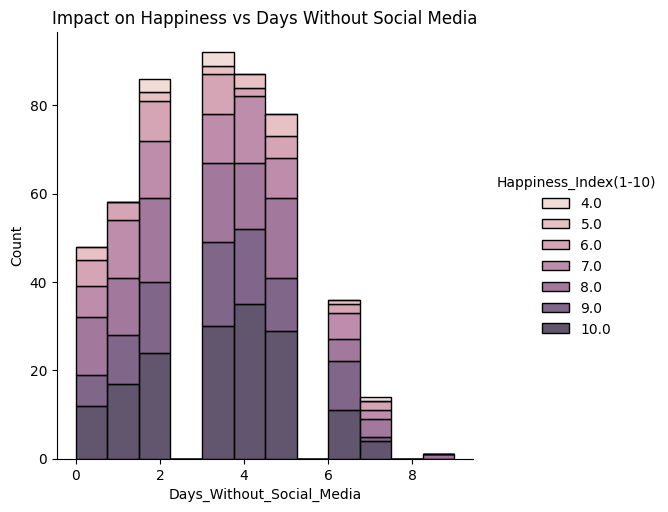

In [ ]:
# Visual distribution using stacked distplot - relationship between Happiness vs Days without Social Media
sns.displot(data=df_clean, x='Days_Without_Social_Media', hue='Happiness_Index(1-10)', multiple='stack')
plt.title('Impact on Happiness vs Days Without Social Media')
plt.show()

In [36]:
#5.1 Get Sleep quality count
df_clean["Sleep_Quality(1-10)"].value_counts()

Sleep_Quality(1-10)
6.0     120
7.0     116
5.0      93
8.0      67
4.0      51
9.0      36
3.0       9
10.0      6
2.0       2
Name: count, dtype: int64

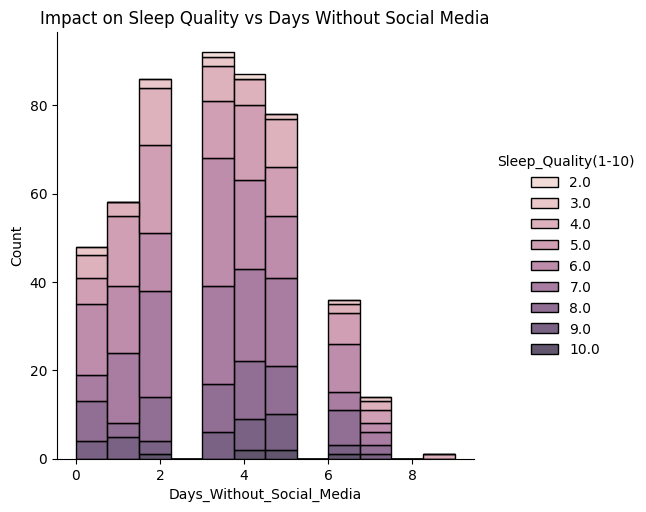

In [38]:
# Visual distribution using stacked distplot - relationship between Sleep vs Days without Social Media
sns.displot(data=df_clean, x='Days_Without_Social_Media', hue='Sleep_Quality(1-10)', multiple='stack')
plt.title('Impact on Sleep Quality vs Days Without Social Media')
plt.show()

In [ ]:
# Get Stress Level count
df_clean["Stress_Level(1-10)"].value_counts()

Stress_Level(1-10)
7.0     129
6.0     109
8.0      89
5.0      76
9.0      40
4.0      32
10.0     14
3.0      10
2.0       1
Name: count, dtype: int64

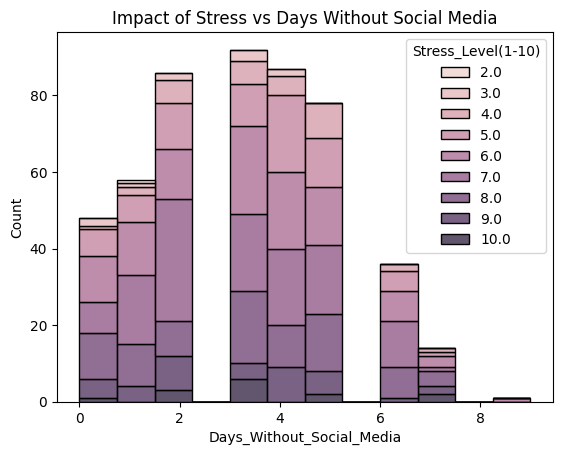

In [ ]:
# Visual distribution using stacked distplot - relationship between Stress vs Days without Social Media
sns.histplot(data=df_clean, x='Days_Without_Social_Media', hue='Stress_Level(1-10)', multiple='stack')
plt.title('Impact of Stress vs Days Without Social Media')
plt.show()

In [39]:
# Get Exercise Freqency count
df_clean["Exercise_Frequency(week)"].value_counts()

Exercise_Frequency(week)
2.0    132
3.0    117
1.0     91
4.0     75
0.0     43
5.0     36
6.0      4
7.0      2
Name: count, dtype: int64

Text(0.5, 1.0, 'Impact on Exercise vs Days Without Social Media')

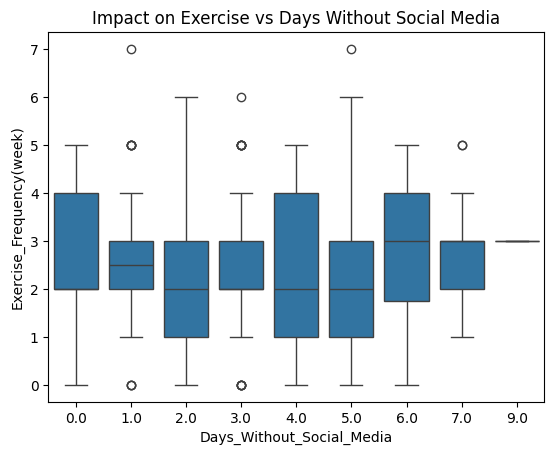

In [40]:
# Visual distribution using box plot showing the relationship between Exercise frequesncy vs Days without Social Media

sns.boxplot(data=df_clean, x="Days_Without_Social_Media", y="Exercise_Frequency(week)")
plt.title('Impact on Exercise vs Days Without Social Media')

From the box plot you can see that most of the users exercised betwen 2-4 days per week with the average being around 3 days. There are a few outliers with most of them exercising 5 days or more a week even though the max value shows users exercising between 4 to 5 days per week. From this there doesn't seem to be much correlation between exercise and number of days without social media.

### 5.4 

In [ ]:
# Analyse relationship with each wellbeing component


In [ ]:
# Visualise 


### 5.4 Key Findings - Question 1

**Summary:**



In summary we can see that there are some positive correlations and impacts on users wellbeing. Particularly with regards to users sleep quality and happiness levels. We can therefore show to social media companies that taking time away from social media is a positive thing, allowing users to reset their minds before returning back to their prefere social platform. We can help user understand that they will more productive in their work and personal life when they make small changes to how and when they use social media. These results can also provide wellbeing educators with data to help them promote healthier online behaviours to regular users of social media platforms.

## 6. Question 2: Social Media Platform Demographics and Screen Time

**Research Question:** What is the typical age and gender for users of different social media platforms and how does their average screen time compare?

**Hypothesis:** Age and Gender will significantly influence which social media platform people use thus affecting screen time.

### 6.1 Research Question

**Question:** What is the typical age and gender for users of different social media platforms and how does their average screen time compare?

**Hypothesis 2:** Age and Gender will significantly influence which social media platform people use thus affecting screen time.

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats
pd.set_option('display.max_rows', 50)


In [118]:
# Using the cleaned data from Section 2
df1 = df_clean.copy()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


In [119]:
screen_social = df1[['Age','Gender','Daily_Screen_Time(hrs)','Social_Media_Platform']]
screen_social.head(10)
#created subset of df with variables of interest 

,Age,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,44,Male,3.1,Facebook
1,30,Other,5.1,LinkedIn
2,23,Other,7.4,YouTube
3,36,Female,5.7,TikTok
4,34,Female,7.0,X (Twitter)
5,38,Male,6.6,LinkedIn
6,26,Female,7.8,TikTok
7,26,Female,7.4,Instagram
8,39,Male,4.7,YouTube
9,39,Female,6.6,Facebook


In [120]:
screen_social.describe()

,Age,Daily_Screen_Time(hrs)
count,500.000000,500.000000
mean,32.988000,5.530000
std,9.960637,1.734877
min,16.000000,1.000000
25%,24.000000,4.300000
50%,34.000000,5.600000
75%,41.000000,6.700000
max,49.000000,10.800000


In [121]:
screen_social[['Age','Daily_Screen_Time(hrs)']].corr()
#not showing a strong positive correlation between age and daily screen time

,Age,Daily_Screen_Time(hrs)
Age,1.000000,0.023505
Daily_Screen_Time(hrs),0.023505,1.000000


<Axes: >

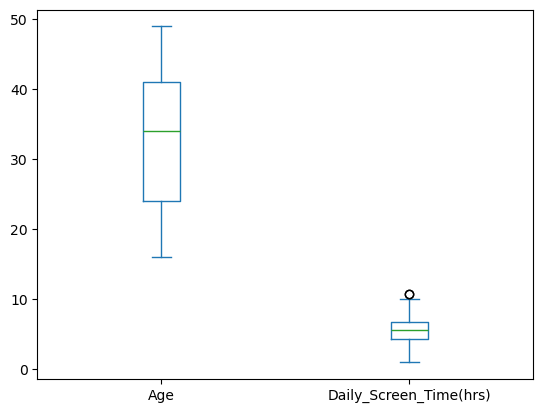

In [122]:
screen_social[['Age','Daily_Screen_Time(hrs)']].plot(kind='box')
# No extreme outliers displayed for age, where median falls at roughly 34/35. 

In [185]:
screen_social.value_counts('Social_Media_Platform')
# Using.value_counts we can see the type of social media platform used and how many people use a particular platform. Tiktok highest num of users. 


Social_Media_Platform
TikTok         95
X (Twitter)    88
LinkedIn       87
Facebook       81
YouTube        75
Instagram      74
Name: count, dtype: int64

In [124]:
screen_social.nunique()

Age                       34
Gender                     3
Daily_Screen_Time(hrs)    82
Social_Media_Platform      6
dtype: int64

The above results don't provide much insight apart from the most used social media platform in the data set. We want to see whether Age and Gender influence social media platform choice and daily screen time. We will investigate below.
We will be feature engineering a new column to ensure a tidier look to data when analysing. 


In [164]:
screen_social.loc[:,'Age_Group'] = pd.cut(screen_social['Age'],
                                    bins=[15,20,25,35,49],
                                    labels=['Teen','Young Adult', 'Adult', 'Older Adult'])
screen_social.head()

,Age,Gender,Daily_Screen_Time(hrs),Social_Media_Platform,Age_Group
0,44,Male,3.1,Facebook,Older Adult
1,30,Other,5.1,LinkedIn,Adult
2,23,Other,7.4,YouTube,Young Adult
3,36,Female,5.7,TikTok,Older Adult
4,34,Female,7.0,X (Twitter),Adult


In [167]:
#checking for any NaN values after creating feature 
screen_social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     500 non-null    int64   
 1   Gender                  500 non-null    object  
 2   Daily_Screen_Time(hrs)  500 non-null    float64 
 3   Social_Media_Platform   500 non-null    object  
 4   Age_Group               500 non-null    category
dtypes: category(1), float64(1), int64(1), object(2)
memory usage: 16.4+ KB


In [149]:
screen_social.groupby('Social_Media_Platform').Age_Group.value_counts()

Social_Media_Platform  Age_Group  
Facebook               Older Adult    38
                       Adult          26
                       Young Adult     9
                       Teen            4
Instagram              Older Adult    36
                       Adult          21
                       Teen            7
                       Young Adult     7
LinkedIn               Older Adult    47
                       Adult          18
                       Young Adult    11
                       Teen           10
TikTok                 Older Adult    45
                       Adult          25
                       Teen           11
                       Young Adult    11
X (Twitter)            Adult          27
                       Older Adult    26
                       Young Adult    17
                       Teen           16
YouTube                Older Adult    34
                       Adult          17
                       Teen           10
                      

<Axes: xlabel='Social_Media_Platform', ylabel='count'>

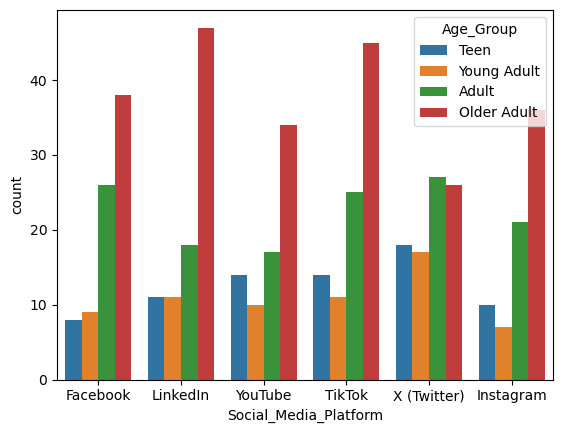

In [321]:
sns.countplot(x='Social_Media_Platform',hue= 'Age_Group', data = screen_social)


1. What is the typical age for each social media platform. 
2. For each social media platform, what is the screen time for those ages? 

In [325]:
mean_1 = screen_social.groupby('Social_Media_Platform')['Age'].mean()
mean_1

Social_Media_Platform
Facebook       33.728395
Instagram      34.297297
LinkedIn       34.402299
TikTok         32.989474
X (Twitter)    30.193182
YouTube        32.533333
Name: Age, dtype: float64

In [326]:
mean_2 = screen_social.groupby('Social_Media_Platform')['Daily_Screen_Time(hrs)'].mean()
mean_2

Social_Media_Platform
Facebook       5.658025
Instagram      6.079730
LinkedIn       5.291954
TikTok         5.457895
X (Twitter)    5.306818
YouTube        5.478667
Name: Daily_Screen_Time(hrs), dtype: float64

In [ ]:
fig, axs = plt.subplots(1,2), figsize =9,3)
axs[0,0].plot(x,y)
axs[0,0].set_title('

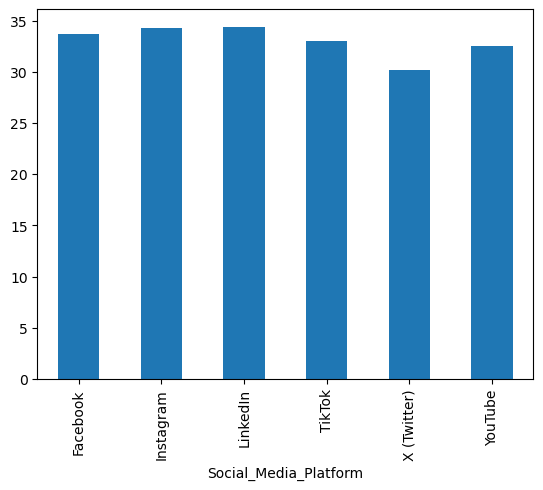

In [231]:
screen_social.groupby('Social_Media_Platform')['Age'].mean().plot(kind= 'bar'),
xlabel='Social Media Platform'
ylabel=('Age')
title = 'Average age per social Media Platform'
plt.show()
#see that the average age using social media is 33 years old.
#label y label as age (maybe using 



In [156]:
screen_social['Daily_Screen_Time(hrs)'].nsmallest()

39     1.0
94     1.0
282    1.5
378    1.5
294    1.7
Name: Daily_Screen_Time(hrs), dtype: float64

In [ ]:
#find max screen time hours by age group
#find min screen time hours by age group 

This has counted the amount of hours spent on social media and also social media plaform by age 

In [254]:
gender_social=screen_social[['Gender','Daily_Screen_Time(hrs)','Social_Media_Platform']]
gender_social.head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,Male,3.1,Facebook
1,Other,5.1,LinkedIn
2,Other,7.4,YouTube
3,Female,5.7,TikTok
4,Female,7.0,X (Twitter)


In [255]:
#Overview of type of social media platform used by gender 
gender_social.groupby(['Social_Media_Platform','Gender'])['Daily_Screen_Time(hrs)'].mean()

Social_Media_Platform  Gender
Facebook               Female    5.782609
                       Male      5.520588
                       Other     4.600000
Instagram              Female    6.177778
                       Male      5.995455
                       Other     6.433333
LinkedIn               Female    5.156818
                       Male      5.405128
                       Other     5.675000
TikTok                 Female    5.406818
                       Male      5.464583
                       Other     6.100000
X (Twitter)            Female    5.122222
                       Male      5.650000
                       Other     3.783333
YouTube                Female    5.634375
                       Male      5.451351
                       Other     4.816667
Name: Daily_Screen_Time(hrs), dtype: float64

In [262]:
gender_social.head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,Male,3.1,Facebook
1,Other,5.1,LinkedIn
2,Other,7.4,YouTube
3,Female,5.7,TikTok
4,Female,7.0,X (Twitter)


In [283]:
gender_social.nlargest(15,'Daily_Screen_Time(hrs)')

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
248,Female,10.8,Instagram
325,Male,10.8,X (Twitter)
202,Female,10.0,TikTok
212,Female,9.8,LinkedIn
56,Female,9.7,Facebook
76,Female,9.7,LinkedIn
388,Male,9.7,TikTok
440,Female,9.5,YouTube
241,Male,9.4,Instagram
475,Female,9.3,Facebook


In [282]:
gender_social.nsmallest(10,'Daily_Screen_Time(hrs)')

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
39,Female,1.0,Facebook
94,Female,1.0,TikTok
282,Female,1.5,LinkedIn
378,Male,1.5,TikTok
294,Female,1.7,TikTok
324,Male,1.7,X (Twitter)
149,Female,1.8,LinkedIn
27,Female,2.0,Facebook
50,Female,2.0,X (Twitter)
260,Female,2.1,X (Twitter)


In [281]:
gender_social['Gender'].value_counts()

Gender
Male      248
Female    229
Other      23
Name: count, dtype: int64

In [329]:
gender_social.loc[gender_social['Gender']=='Male'].head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
0,Male,3.1,Facebook
5,Male,6.6,LinkedIn
8,Male,4.7,YouTube
14,Male,6.3,X (Twitter)
17,Male,5.4,TikTok


In [328]:
gender_social.loc[gender_social['Gender']=='Female'].head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
3,Female,5.7,TikTok
4,Female,7.0,X (Twitter)
6,Female,7.8,TikTok
7,Female,7.4,Instagram
9,Female,6.6,Facebook


In [327]:
gender_social.loc[gender_social['Gender']=='Other'].head()

,Gender,Daily_Screen_Time(hrs),Social_Media_Platform
1,Other,5.1,LinkedIn
2,Other,7.4,YouTube
11,Other,5.4,Instagram
21,Other,6.4,TikTok
25,Other,5.7,X (Twitter)


### 6.5 Visualizations

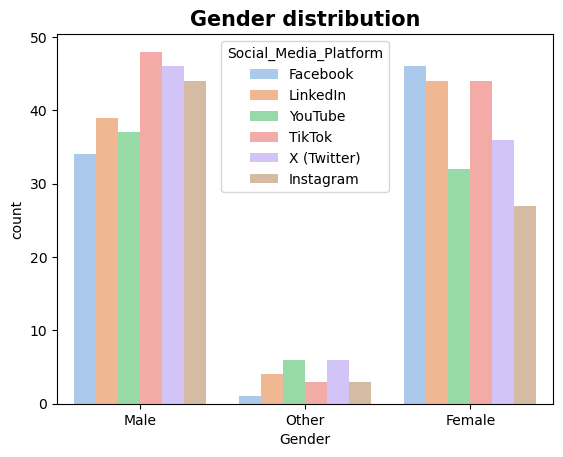

In [338]:
sns.countplot(x="Gender",data=screen_social, hue="Social_Media_Platform", palette="pastel")
plt.title("Gender distribution", fontsize =15, fontweight ="bold")
plt.show()

In [340]:
gender_social[['Social_Media_Platform','Gender']].describe()

,Social_Media_Platform,Gender
count,500,500
unique,6,3
top,TikTok,Male
freq,95,248


Text(0.5, 1.0, 'Gender: Daily Screen Time vs Social Media Platform')

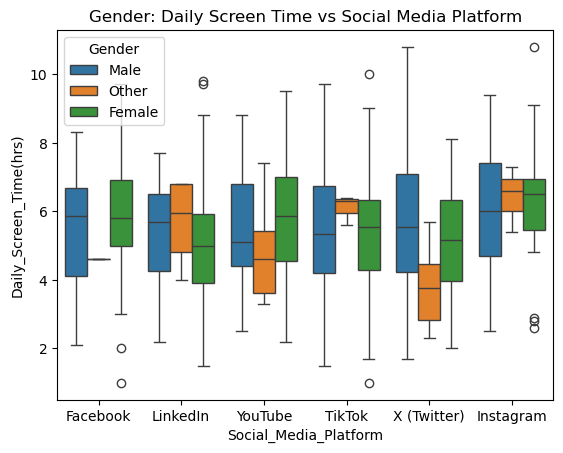

In [350]:
sns.boxplot(data= gender_social, x= 'Social_Media_Platform', y='Daily_Screen_Time(hrs)', hue= 'Gender')
plt.title("Gender: Daily Screen Time vs Social Media Platform")


## 7. Question 3: Stress Level Predictors

**Research Question:** What are the most significant predictors of a user's Stress_Level, and can a model accurately predict whether a user falls into high or low stress categories based on lifestyle factors?

**Goal:** Create models to predict stress binary level (low or high) using lifestyle factors.

### 7.1 Research Question

**Question:** What are the most significant predictors of a user's Stress_Level, and can a model accurately predict whether a user falls into the high or low stress categories based on lifestyle factors?

**Goal:** Create a model to predict stress binary level (low or high) using lifestyle factors.

# Machine Learning Prediction
The Goal is to create a model to predict the Stress binary level (low or high ) by using the available parameters:'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
    'Exercise_Frequency(week)', 'Happiness_Index(1-10)', 'Stress_Level_Binary(low_stress), high_stress(6-10))', and 'Wellbeing_Score

## For Binary classification, the two models above will be compared 

# Conceptual representation of model philosophies
1. Linear_Model = "Logistic Regression"      # Simplicity & interpretability
2. "Random Forest"          # Complexity & predictive power

### The Process (Same for Both!):
1. Set up and Load data
2. Split into training and testing
3. Train the model
4. Make predictions
5. Findings

In [8]:
df.head(3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0


In [9]:
df_ml = df.copy()
df_ml.head(3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0


In [10]:
df_ml['Wellbeing_Score'] = (
    df_ml['Happiness_Index(1-10)'] +
    df_ml['Sleep_Quality(1-10)'] +
    df_ml['Exercise_Frequency(week)'] +
    (11 - df_ml['Stress_Level(1-10)'])
)

In [11]:
df_ml.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)', 'Wellbeing_Score'],
      dtype='object')

### 7.2 Feature Engineering - Stress Level Binary

In [12]:
#value is 1, otherwise 0, where 0= low stress (1-5) 1= high stress (6-10)
Stress_Level_Binary = df_ml['Stress_Level(1-10)'] >= 6

In [13]:
df_ml['Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'] = np.where(Stress_Level_Binary, 1, 0)

In [14]:
df_ml.head(3)

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Wellbeing_Score,"Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0,27.0,1
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0,23.0,1
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0,19.0,1


In [15]:
# We nolonger need the Stress_Level(1-10)
df_ml = df_ml.drop(columns=['Stress_Level(1-10)'], inplace=False)

In [16]:
df_ml.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Social_Media_Platform',
       'Happiness_Index(1-10)', 'Wellbeing_Score',
       'Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))'],
      dtype='object')

### 7.3 Feature Importance Analysis

In [17]:
# Checks what to Keep vs Drop
# Drop target + ID column

df_clean = df_ml.drop(columns=[
    "User_ID",
    "Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"
], errors="ignore")

# One-hot encode categorical features automatically
X = pd.get_dummies(df_clean)


# Target
y = df_ml["Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"]

# Train model
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)

# Sort smallest → largest
importances = importances.sort_values()

print(importances)

Gender_Other                         0.005111
Social_Media_Platform_Instagram      0.005264
Social_Media_Platform_TikTok         0.007236
Social_Media_Platform_YouTube        0.007947
Social_Media_Platform_Facebook       0.008725
Gender_Female                        0.010529
Social_Media_Platform_LinkedIn       0.011149
Gender_Male                          0.014277
Social_Media_Platform_X (Twitter)    0.016072
Days_Without_Social_Media            0.042394
Sleep_Quality(1-10)                  0.053120
Age                                  0.066023
Exercise_Frequency(week)             0.077739
Happiness_Index(1-10)                0.095944
Daily_Screen_Time(hrs)               0.163391
Wellbeing_Score                      0.415080
dtype: float64


### 7.4 Model Interpretation

In [25]:
# Prepare data for classification
# We'll use all the features to predict Stress_Level_ Binary 
# 1. Make a copy to avoid modifying the original
df_prepared = df_ml.copy()

# 2. Define target
target_col = "Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"
y = df_prepared[target_col]

# 3. Drop target and User_ID from features
X = df_prepared.drop(columns=[target_col, 'User_ID'])

# 4. Encode ALL categorical variables (Gender, Social_Media_Platform)
X_encoded = pd.get_dummies(X, drop_first=True)

# 5. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)
    
print(f"Training on {len(X_train)} people")
print(f"Testing on {len(X_test)} people")
print()
print("Distribution in training set:")
print(y_train.value_counts())
print()
print("Distribution in testing set:")
print(y_test.value_counts())

Training on 400 people
Testing on 100 people

Distribution in training set:
Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))
1    305
0     95
Name: count, dtype: int64

Distribution in testing set:
Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))
1    76
0    24
Name: count, dtype: int64


In [29]:
# Train the classification model
class_model = LogisticRegression(random_state=42, max_iter=1000)
class_model.fit(X_train, y_train)

# Make predictions
y_pred_train = class_model.predict(X_train)
y_pred_test = class_model.predict(X_test) 

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f"Training Accuracy: {train_accuracy:.2%}")
print(f"Testing Accuracy:  {test_accuracy:.2%}")

Training Accuracy: 99.75%
Testing Accuracy:  99.00%


In [31]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print(f"Precision: {precision:.2%}")  # Of predicted high stress, how many actually high?
print(f"Recall:    {recall:.2%}")     # Of actual high stress, how many did we catch?
print(f"F1-Score:  {f1:.2%}")         # Balance of precision and recall

Precision: 98.70%
Recall:    100.00%
F1-Score:  99.35%



#### We are going to run the model **without Wellbeing_score** to determine if it has a major influence.


In [66]:
# Prepare data WITHOUT Wellbeing_Score
target_col = "Stress_Level_Binary(0=low_stress(1-5),1=high_stress(6-10))"
y = df_ml[target_col]

# Drop target, User_ID, and Wellbeing_Score
X = df_ml.drop(columns=[target_col, 'User_ID', 'Wellbeing_Score'])
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples:  {len(X_test)}")
print(f"Features: {X_train.shape[1]}")


Dataset:
Training samples: 400
Testing samples:  100
Features: 13


In [67]:
# Train the classification model without Wellbeing Score
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Metrics
train_acc_lr = accuracy_score(y_train, y_pred_train_lr)
test_acc_lr = accuracy_score(y_test, y_pred_test_lr)

print(f"LRegression Training Accuracy without Wellbeing_Score: {train_acc_lr:.2%}")
print(f"LRegression Testing Accuracy without Wellbeing_Score:  {test_acc_lr:.2%}")

LRegression Training Accuracy without Wellbeing_Score: 86.25%
LRegression Testing Accuracy without Wellbeing_Score:  87.00%


In [68]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_lr = precision_score(y_test, y_pred_test_lr)  # ← y_pred_test_lr, not y_pred_rf!
recall_lr = recall_score(y_test, y_pred_test_lr)        # ← y_pred_test_lr
f1_lr = f1_score(y_test, y_pred_test_lr)               # ← y_pred_test_lr

print(f"\nLogistic Regression Metrics:")
print(f"Precision: {precision_lr:.2%}")
print(f"Recall:    {recall_lr:.2%}")
print(f"F1-Score:  {f1_lr:.2%}")



Logistic Regression Metrics:
Precision: 90.91%
Recall:    92.11%
F1-Score:  91.50%


### 7.5 Random Forest Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

print("RANDOM FOREST WITHOUT WELLBEING_SCORE")

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

train_acc_rf = accuracy_score(y_train, y_train_pred_rf)
test_acc_rf = accuracy_score(y_test, y_test_pred_rf)
precision_rf = precision_score(y_test, y_test_pred_rf)
recall_rf = recall_score(y_test, y_test_pred_rf)
f1_rf = f1_score(y_test, y_test_pred_rf)

print(f"Training Accuracy: {train_acc_rf:.2%}")
print(f"Testing Accuracy:  {test_acc_rf:.2%}")
print(f"Precision: {precision_rf:.2%}")
print(f"Recall:    {recall_rf:.2%}")
print(f"F1-Score:  {f1_rf:.2%}")

RANDOM FOREST WITHOUT WELLBEING_SCORE
Training Accuracy: 100.00%
Testing Accuracy:  86.00%
Precision: 88.75%
Recall:    93.42%
F1-Score:  91.03%


## 8. Summary and Conclusions

### 8.1 Project Overview

same as start of notebook

### 8.2 Key Findings Summary

**Question 1: Days Without Social Media and Wellbeing**


**Question 2: Platform Demographics**


**Question 3: Stress Predictors**
-

### 8.3 Cross-Question Insights



### 8.4 Limitations



### 8.5 Recommendations

**For Individuals:**


**For Future Research:**


## credits